In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets.samples_generator import make_blobs, make_moons

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from plots import cluster_plot

sns.set_context('notebook')
sns.set_palette("pastel")

## Input data

In [2]:
# Create input data
# centers = [[1, 1], [-1, -1], [1, -1], [-2, 1]]
# blobs, _ = make_blobs(n_samples=500, centers=centers, cluster_std=0.4, random_state=100)
# moons, _ = make_moons(n_samples=250, noise=0.1, random_state=19)

moons, lblmoons = make_moons(n_samples=250, noise=0.05)
blobs, lblblobs = make_blobs(n_samples=250, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.3)

X = np.vstack([moons, blobs])
y = np.hstack([lblmoons, lblblobs+2])

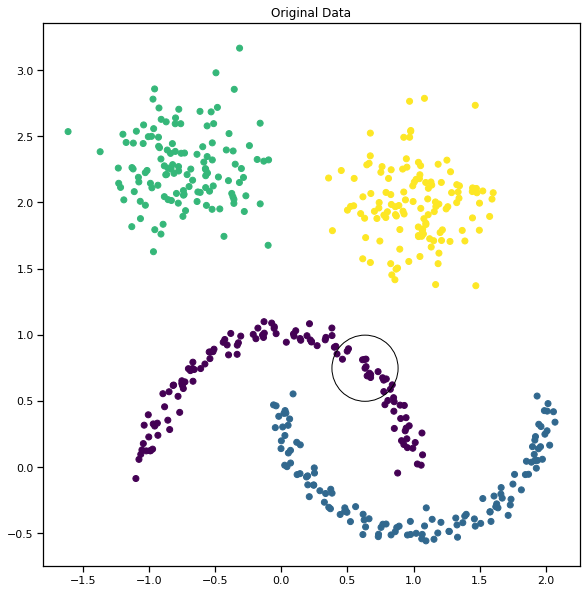

In [3]:
cluster_plot(X, y, title='Original Data', circle=True)

## Testing my implementation

In [16]:
from dbscan import DBSCAN

In [5]:
%time

clusters = DBSCAN(eps=0.25, min_pts=10).fit(X)
# np.array(clusters)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.29 µs


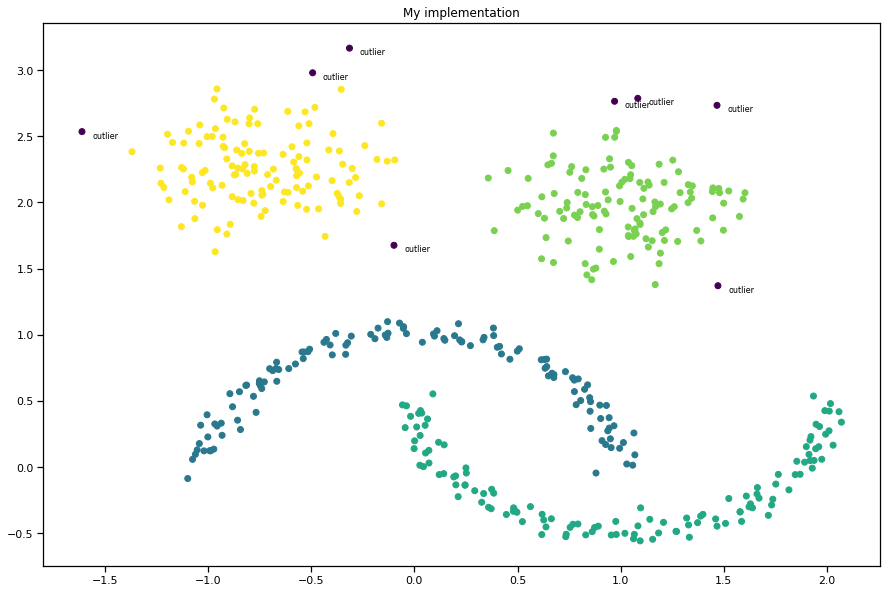

In [6]:
cluster_plot(X, clusters, title='My implementation')

## Scikit-Learn implementation

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
%time

clusters_sk = DBSCAN(eps=0.25, min_samples=10).fit(X)
# clusters_sk.labels_

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


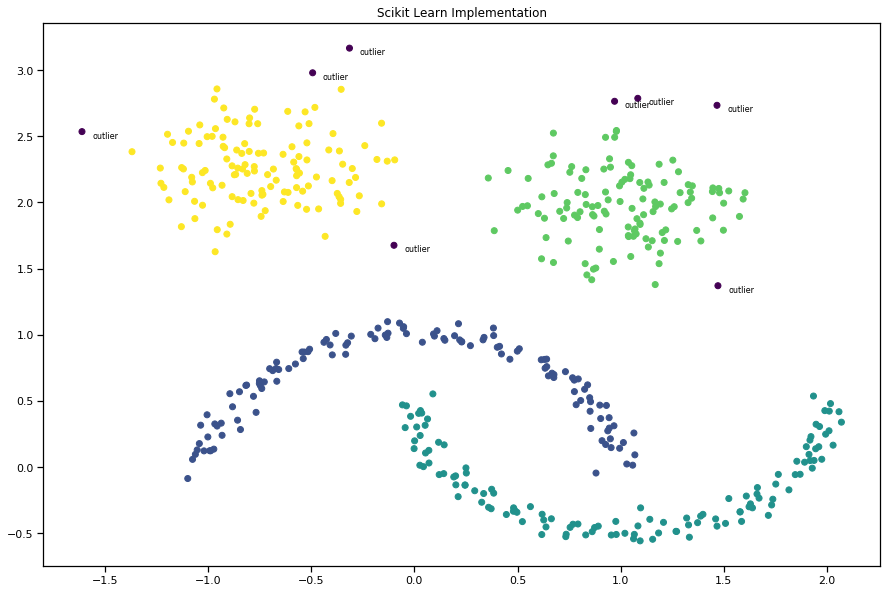

In [9]:
cluster_plot(X, clusters_sk.labels_, title='Scikit Learn Implementation')

## HDBCSN implementation

In [10]:
import hdbscan

In [11]:
%time

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(X)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs


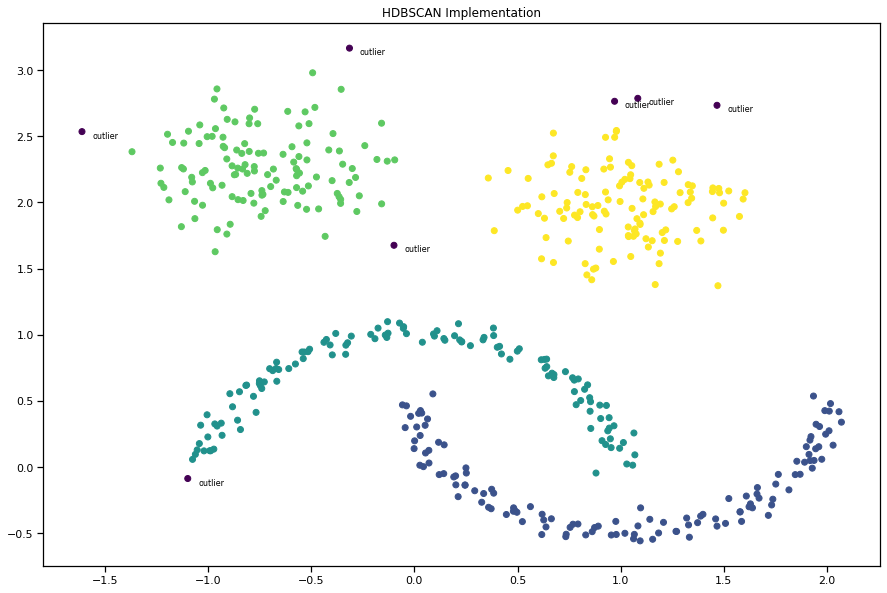

In [12]:
cluster_plot(X, cluster_labels, title='HDBSCAN Implementation')

## K-Means

In [13]:
from sklearn.cluster import KMeans

In [14]:
%time 

clusters_kmeans = KMeans(n_clusters=4).fit(X)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


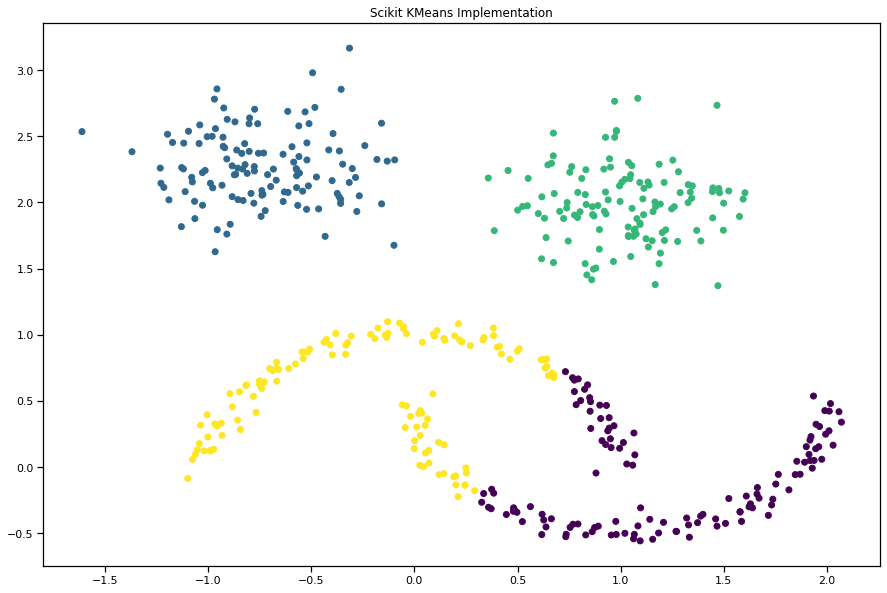

In [15]:
cluster_plot(X, clusters_kmeans.labels_, title='Scikit KMeans Implementation')